In [25]:
#Loading packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import math
import random
import json
from numpy import genfromtxt
from datetime import datetime, timedelta
import time
import pytz

In [2]:
import os
dir_path = 'tweet_data/'
hash_files = os.listdir(dir_path)

hash_filenames = []



for f in hash_files:
    hash_filenames.append(dir_path + f)
print(hash_filenames)

num_hash = len(hash_filenames)

['tweet_data/tweets_#nfl.txt', 'tweet_data/tweets_#superbowl.txt', 'tweet_data/tweets_#sb49.txt', 'tweet_data/tweets_#patriots.txt', 'tweet_data/tweets_#gopatriots.txt', 'tweet_data/tweets_#gohawks.txt']


Statistics for  #nfl -------------
Total tweets:  259024
Total time:  927
Average number of tweets per hour 279.24999992513295
Average number of followers of users posting the tweets:  4289.746617531629
Total retweets:  398517
Average number of retweets:  1.5385331089011056


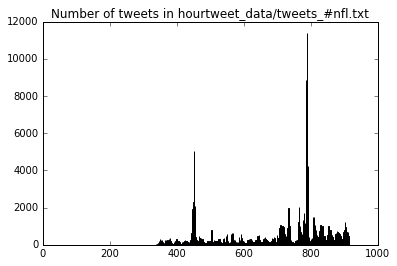



Statistics for  #superbowl -------------
Total tweets:  1348767
Total time:  963
Average number of tweets per hour 1399.791338440804
Average number of followers of users posting the tweets:  3591.604474474039
Total retweets:  3221223
Average number of retweets:  2.3882723999030224


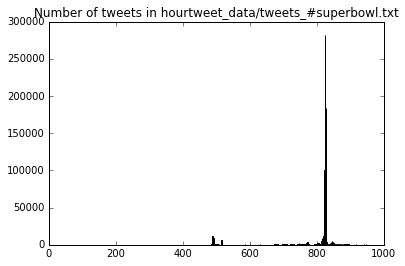



Statistics for  #sb49 -------------
Total tweets:  826951
Total time:  583
Average number of tweets per hour 1417.4541164169596
Average number of followers of users posting the tweets:  2235.1636799951193
Total retweets:  2076597
Average number of retweets:  2.5111487863247035


Statistics for  #patriots -------------
Total tweets:  489713
Total time:  981
Average number of tweets per hour 498.9122489367139
Average number of followers of users posting the tweets:  1650.321982506216
Total retweets:  873068
Average number of retweets:  1.7828156491659402


Statistics for  #gopatriots -------------
Total tweets:  26232
Total time:  684
Average number of tweets per hour 38.328618451760065
Average number of followers of users posting the tweets:  1298.8242710358234
Total retweets:  36727
Average number of retweets:  1.4000838670326319


Statistics for  #gohawks -------------
Total tweets:  188136
Total time:  973
Average number of tweets per hour 193.3459206610117
Average number of follow

In [95]:
pst_tz = pytz.timezone('US/Pacific')

for i in range(num_hash):  
    max_sec = 0
    min_sec = 0
    tmp = 0
    num_followers = 0
    user_set = set()
   
    with open(hash_filenames[i]) as input_file:
        
        for single_line in input_file:
            tweets = json.loads(single_line)
            
            if tweets['tweet']['user']['id'] not in user_set:
                user_set.add(tweets['tweet']['user']['id'])
                num_followers = num_followers + tweets['author']['followers']
            
            if tmp is 0:
                min_sec = tweets['firstpost_date']
                tmp = 1
            
            max_sec = tweets['firstpost_date']
            
        input_file.close()
    
    time_in_hours = ((max_sec - min_sec) / 3600) + 0.00
    total_user = len(user_set)
    
    #print('For ', hash_filenames[i], 'hashtag ', total_user, 'users tweeted in the last', time_in_hours, 'hours')
    
    with open(hash_filenames[i]) as input_file:
            hash_tags = hash_filenames[i]
            hash_tag = hash_tags[18:-4]
            
            tweet_count = [0] * (int(time_in_hours) + 1)
            
            j = -1
            num_retweets = 0
            num_tweets = 0
           
        
            for single_line in input_file:
                tweets = json.loads(single_line)
                j = math.floor((tweets['citation_date'] - min_sec) / 3600.0)
                
                if j <= len(tweet_count):
                    tweet_count[j] = tweet_count[j] + 1
                    num_tweets = num_tweets + 1
                else:
                    print('j: ', j, 'window size: ', len(tweet_count))
                num_retweets = num_retweets + tweets['metrics']['citations']['total']
                
            #print('For ', hash_filenames[i], 'total number of retweets is', num_retweets)
            
            window = [0]*(int(time_in_hours) + 1)
            k = 0
            total_tweets = 0
            
            while k <= int(time_in_hours):
                window[k] = k
                
                if tweet_count[k] > 0:
                    total_tweets = total_tweets + tweet_count[k]
                
                k = k + 1
            
            print('Statistics for ', hash_tag, '-------------')    
            
            avg_num_tweets = total_tweets / (time_in_hours + 1.0)
            print('Total tweets: ', total_tweets)
            print('Total time: ', int(time_in_hours + 1))
            print('Average number of tweets per hour', avg_num_tweets)
            
            avg_num_followers = (num_followers + 0.0) / (total_user + 0.0)
            print('Average number of followers of users posting the tweets: ', avg_num_followers)
            
            avg_num_retweets = (num_retweets + 0.0) / (num_tweets + 0.0)
            print('Total retweets: ', num_retweets)
            print('Average number of retweets: ', avg_num_retweets)
            
            #Plotting per hour tweets for #superbowl and #nfl
            if hash_tag == '#superbowl' or hash_tag == '#nfl':
                plt.bar(window, tweet_count)
                titl = 'Number of tweets in hour' + hash_tags
                plt.title(titl)
                plt.show()
    
    
            print('\n')